In [1]:
import mne
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
sleep_data_dir = Path("../../sleep-edf-database-expanded-1.0.0/sleep-cassette/")
file_idx = 200
recordings = [x[:6] for x in os.listdir(sleep_data_dir)]
psg_files = list(sleep_data_dir.glob("*.edf"))
hypnogram_files = list(sleep_data_dir.glob("*-Hypnogram.edf"))

# #file that starts with recordings[file_idx]
psg_file = [x.name for x in psg_files if x.name.startswith(recordings[0]) and x.name.endswith("PSG.edf")][0]
print(psg_file)

data = mne.io.read_raw_edf(sleep_data_dir / psg_file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

SC4412E0-PSG.edf
Extracting EDF parameters from /home/annareisz/Documents/DeepLearningSignalProcessing/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4412E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_13999/3418270808.py:11: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  data = mne.io.read_raw_edf(sleep_data_dir / psg_file)
/tmp/ipykernel_13999/3418270808.py:11: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  data = mne.io.read_raw_edf(sleep_data_dir / psg_file)
/tmp/ipykernel_13999/3418270808.py:11: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  data = mne.io.read_raw_edf(sleep_data_dir / psg_file)


In [3]:
samples = 7950000
sampling_rate_hz = 100
duration = samples / sampling_rate_hz
hours = duration / 3600
print(f"Duration: {hours:.0f} hours")

Duration: 22 hours


# EDA

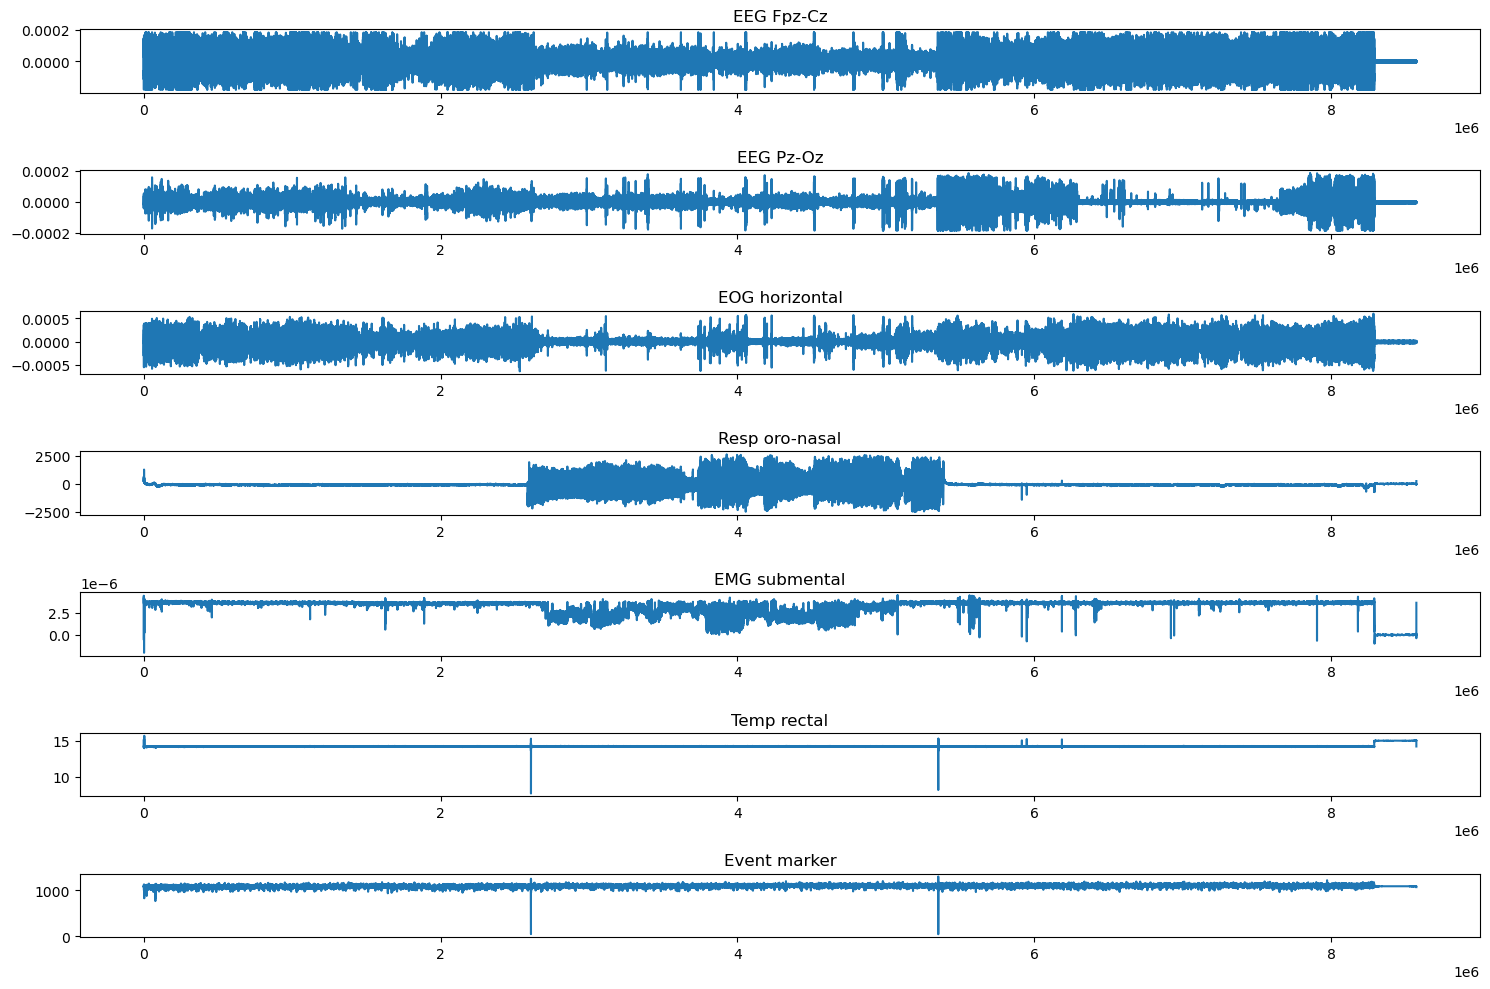

In [4]:
fig, axs = plt.subplots(len(channels), 1, figsize=(15, 10))
for i, ax in enumerate(axs):
    ax.plot(raw_data[i, :])
    ax.set_title(channels[i])
plt.tight_layout()
plt.show()

In [5]:
# read hypnograms
hypnogram_file = [x.name for x in hypnogram_files if x.name.startswith(recordings[0]) and x.name.endswith("Hypnogram.edf")][0]
hypnogram = mne.read_annotations(sleep_data_dir / hypnogram_file)
print(hypnogram)

<Annotations | 196 segments: Sleep stage 1 (36), Sleep stage 2 (50), Sleep ...>


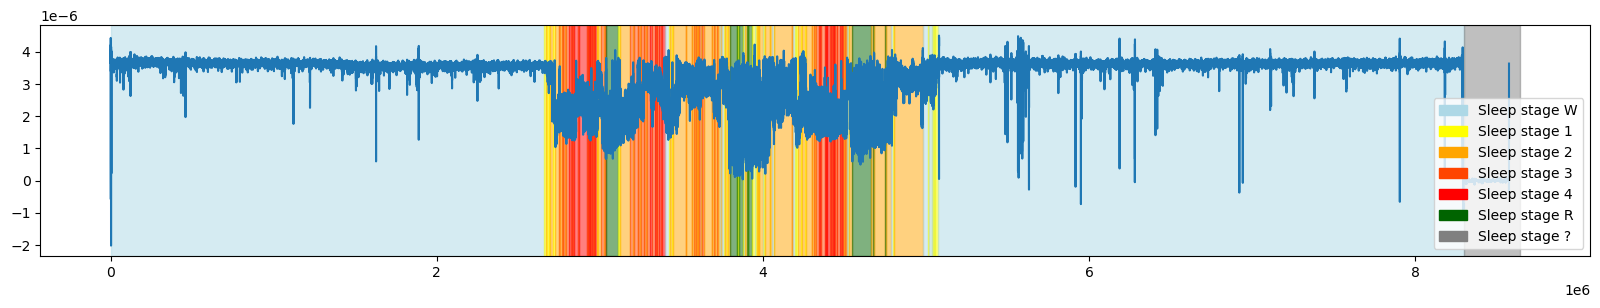

In [6]:
import matplotlib.patches as mpatches

# plot sleep stage onto emg_submental channel
emg_submental = raw_data[channels.index("EMG submental"), :]
plt.figure(figsize=(20, 3))
plt.plot(emg_submental)
onsets = hypnogram.onset
durations = hypnogram.duration
descriptions = hypnogram.description
colors = {"Sleep stage W": "lightblue", "Sleep stage 1": "yellow", "Sleep stage 2": "orange", "Sleep stage 3": "orangered", "Sleep stage 4": "red", "Sleep stage R": "darkgreen", "Sleep stage ?": "gray"}
for i in range(len(onsets)):
    description = descriptions[i]
    onset = onsets[i] * sampling_rate_hz
    duration = durations[i] * sampling_rate_hz
    
    plt.axvspan(onset, onset + duration, alpha=0.5, color=colors[description])

patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=patches, loc="lower right")
plt.show()


30.0 32250.0


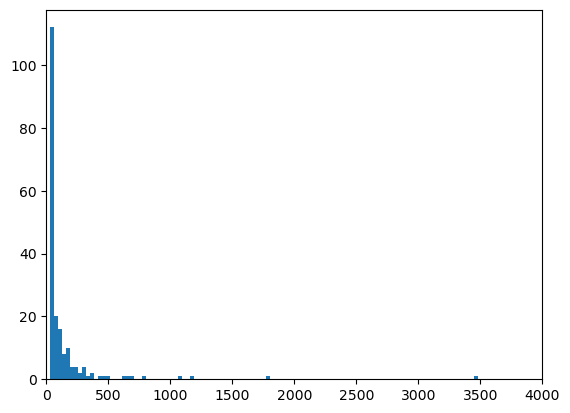

In [7]:
# durations of all hypnogram stages
print(durations.min(), durations.max())
plt.hist(durations, bins=1000)
plt.xlim(0, 4000)
plt.show()

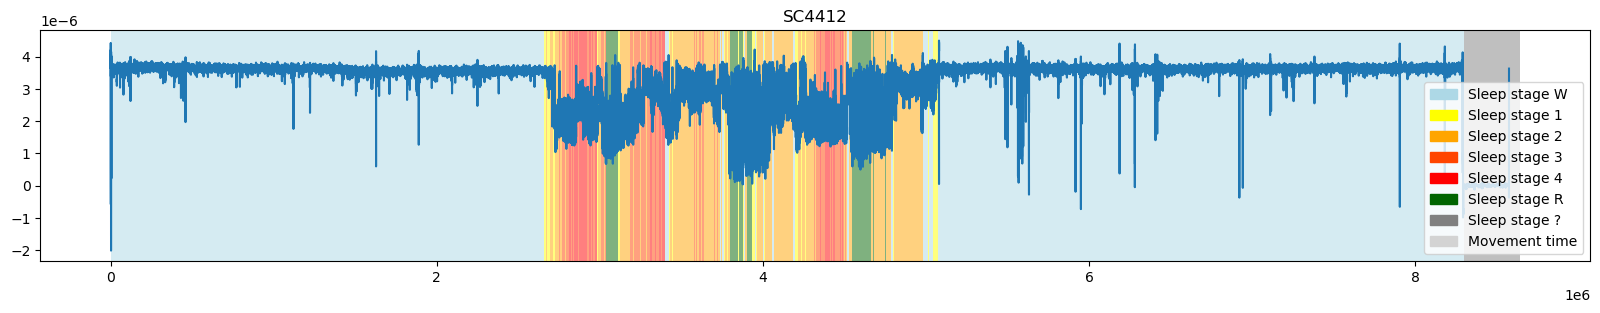

Recording SC4412 has 196 hypnogram stages
Duration: 24.00 hours



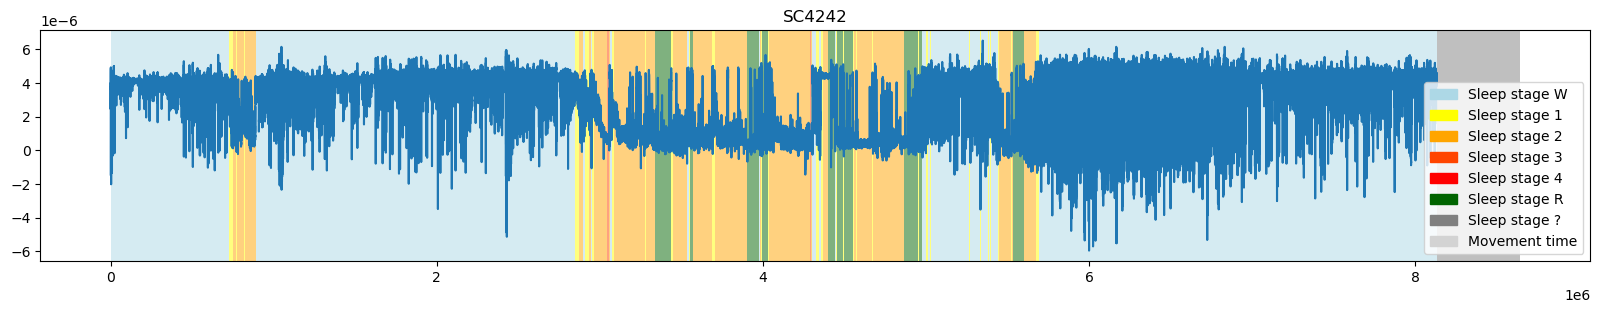

Recording SC4242 has 118 hypnogram stages
Duration: 24.00 hours



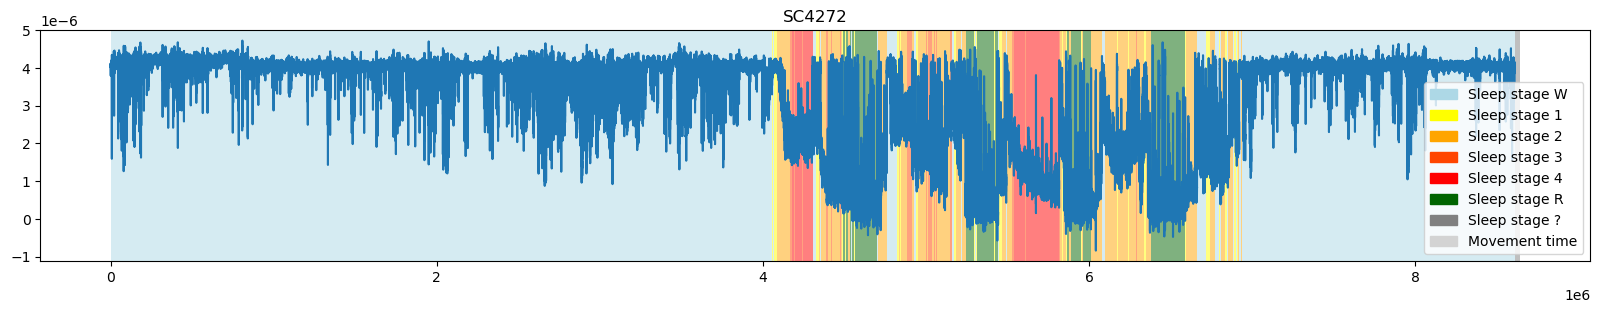

Recording SC4272 has 169 hypnogram stages
Duration: 24.00 hours



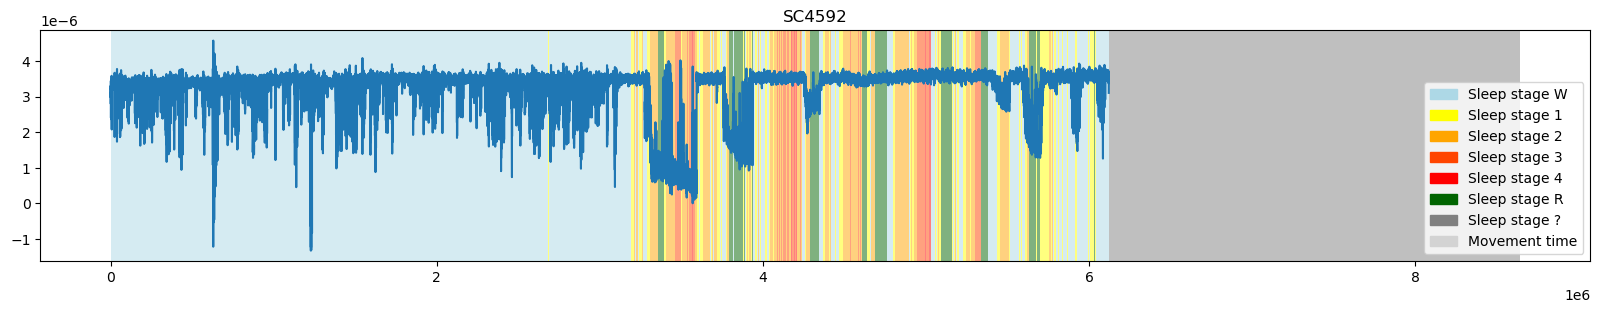

Recording SC4592 has 274 hypnogram stages
Duration: 24.00 hours



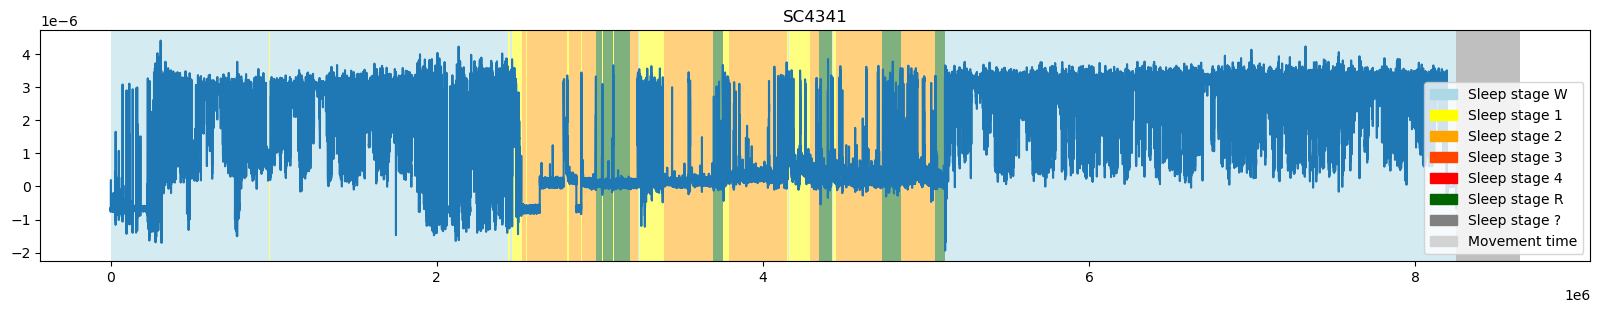

Recording SC4341 has 50 hypnogram stages
Duration: 24.00 hours



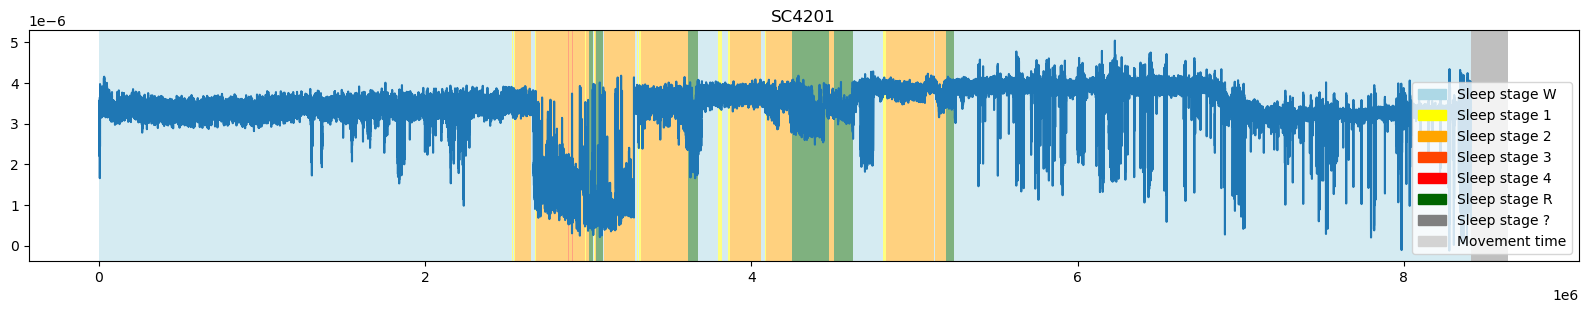

Recording SC4201 has 56 hypnogram stages
Duration: 24.00 hours



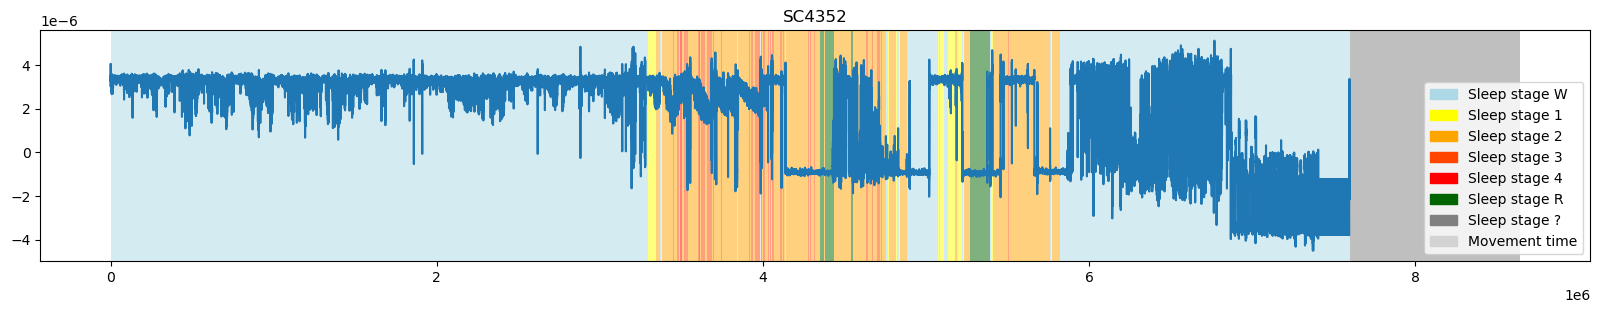

Recording SC4352 has 150 hypnogram stages
Duration: 24.00 hours



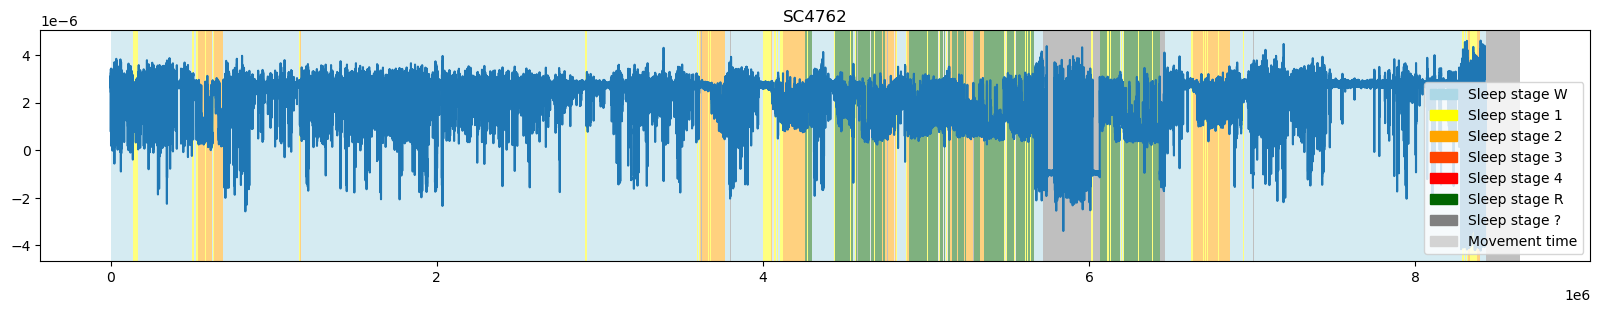

Recording SC4762 has 254 hypnogram stages
Duration: 24.00 hours



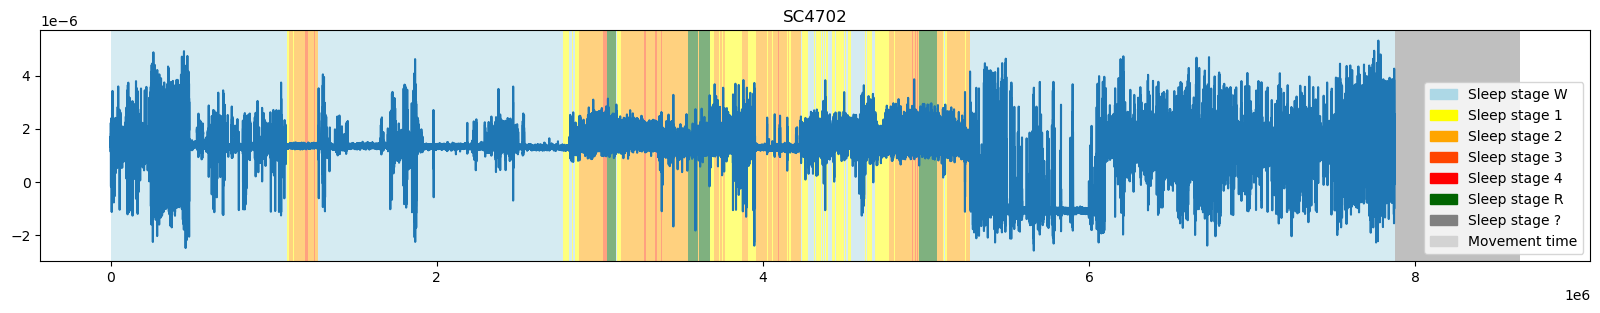

Recording SC4702 has 133 hypnogram stages
Duration: 24.00 hours



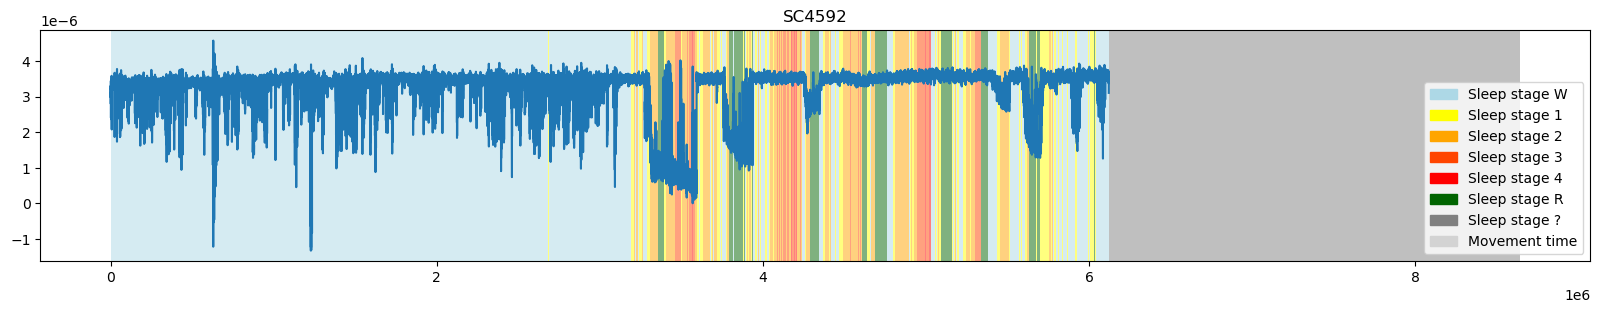

Recording SC4592 has 274 hypnogram stages
Duration: 24.00 hours



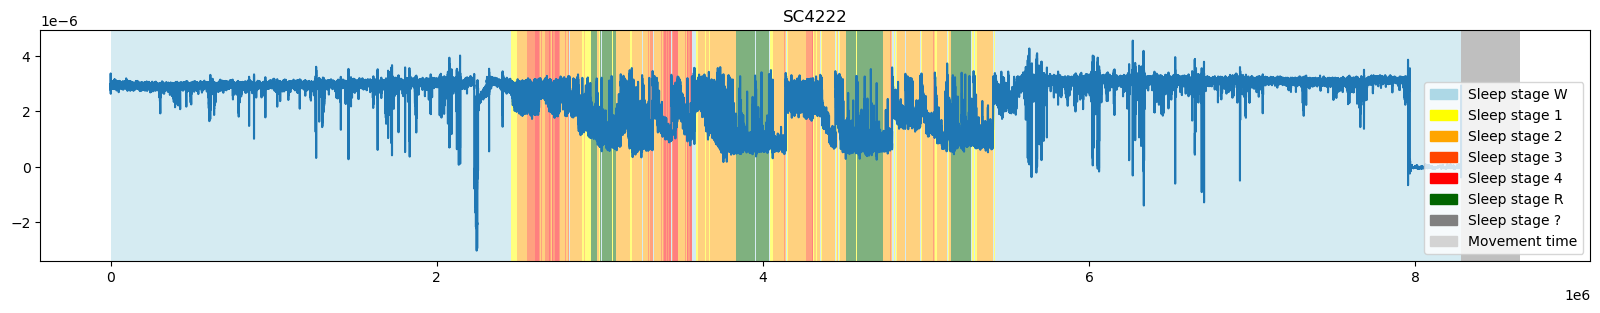

Recording SC4222 has 182 hypnogram stages
Duration: 24.00 hours



In [8]:
# ignor warnings
import warnings
warnings.filterwarnings('ignore')

limit = 10
for idx, recording in enumerate(recordings):
    psg_file = [x.name for x in psg_files if x.name.startswith(recording) and x.name.endswith("PSG.edf")][0]
    hypnogram_file = [x.name for x in hypnogram_files if x.name.startswith(recording) and x.name.endswith("Hypnogram.edf")][0]
    
    data = mne.io.read_raw_edf(sleep_data_dir / psg_file, verbose=False)
    raw_data = data.get_data()
    info = data.info
    channels = data.ch_names
    
    hypnogram = mne.read_annotations(sleep_data_dir / hypnogram_file)
    
    emg_submental = raw_data[channels.index("EMG submental"), :]
    plt.figure(figsize=(20, 3))
    plt.plot(emg_submental)
    onsets = hypnogram.onset
    durations = hypnogram.duration
    descriptions = hypnogram.description
    colors = {"Sleep stage W": "lightblue", "Sleep stage 1": "yellow", "Sleep stage 2": "orange", "Sleep stage 3": "orangered", "Sleep stage 4": "red", "Sleep stage R": "darkgreen", "Sleep stage ?": "gray", "Movement time": "lightgray"}
    for i in range(len(onsets)):
        description = descriptions[i]
        onset = onsets[i] * sampling_rate_hz
        duration = durations[i] * sampling_rate_hz

        plt.axvspan(onset, onset + duration, alpha=0.5, color=colors[description], lw=0)

    patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
    plt.legend(handles=patches, loc="lower right")
    plt.title(recording)
    plt.show()
    
    print(f"Recording {recording} has {len(onsets)} hypnogram stages")
    print(f"Duration: {durations.sum() / 3600:.2f} hours")
    
    print("")

    if idx == limit:
        break

In [9]:
print("number of samples", len(recordings))

number of samples 306
